## Data Science Project
#### Riley So

#### Introduction
The Computer Science department at the University of British Columbia (UBC) is running a project that uses a Minecraft server to study players behaviors. Actions performed by players are logged, creating a data set that captures behavior, characteristiscs, and engagement patterns.

However running this type of research project takes time and money. The team needs to buy software licenses, manage server capacity, and find the right players to join. One way to reach players and increase player count is through a game-related newsletter. Knowing which players are most likely to subscribe can help the team focus their recruitment and use their resources more wisely.

##### **Question**
In order to help the research team target their recruitment efforts, we aim to answer the following question.
> Can player characteristics such as age, gender, experience level, and total hours played predict whether a player subscribes to a game-related newsletter?

#### Data Description

There are two datasets:
- `players.csv`: Contains demographic and self-reported experience information for 196 players.
- `sessions.csv`: Contains 1,535 records of individual gameplay sessions.

To explore this data we will begin by loading the data.


In [5]:
library(tidyverse)

# Load players and sessions data
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Now we will provide a find the dimensions of the data, its structure, and its variable types.

In [9]:
#Data Set Dimensions
players_dim <- players |> dim()
sessions_dim <- sessions |> dim()

players_dim
sessions_dim

#Structure and Variable Types
players |> glimpse()
sessions |> glimpse()

[1] 196   7

[1] 1535    5

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

The `players.csv` dataset contains 196 rows and 7 columns, while `sessions.csv` has 1,535 rows and 5 columns. Each row in `players.csv` represents a unique player, while each row in `sessions.csv` represents one play session. The `players` dataset includes categorical, numeric, and logical types. `sessions` is mainly timestamp-based with a unique ID (`hashedEmail`) used in both datasets.

Before summarising statistics we want to account for missing values.

In [10]:
players |> summarise(across(everything(), ~ sum(is.na(.))))
sessions |> summarise(across(everything(), ~ sum(is.na(.))))

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,2


hashedEmail,start_time,end_time,original_start_time,original_end_time
<int>,<int>,<int>,<int>,<int>
0,0,2,0,2


- `players.csv` has **2 missing values** in the `Age` column.
- `sessions.csv` has **2 missing values** in `end_time` and `original_end_time`.
No other missing values are present.

In [18]:
players |> summary()
sessions |> summary()

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

##### Summary of Data
**players.csv**

- **Age**: Ranges from 8 to 50 years (Mean: 20.5, Median: 19). Most players are in their late teens or early 20s. Two values are missing.
- **played_hours**: Strongly right-skewed — Median is only 0.1, but Max is 223 hours. Most players spent very little time on the server, with a few heavy users.
- **subscribe**: About 73% (144/196) of players subscribed to the newsletter this is our target variable.
- **experience & gender**: Character columns that will be converted to categorical for modeling and grouped visualization.
- **name & hashedEmail**: Identifiers, not used for modeling directly.

**sessions.csv**

- **original_start_time / original_end_time**: Unix timestamps covering mid-2024. Can be used to analyze peak play times or session durations. Two `original_end_time` values are missing.
- **start_time / end_time**: Human-readable time strings. Useful for plotting session timing trends.
- **hashedEmail**: Common key with `players.csv` for potential grouping but not needed for prediction.



Additionally lets look at the **categorical data**

In [20]:
# players
players |> count(experience)
players |> count(gender)
players |> count(subscribe)

# sessions
sessions |> distinct(hashedEmail) |> count(name = "unique_players")

experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


subscribe,n
<lgl>,<int>
FALSE,52
TRUE,144


unique_players
<int>
125


**Observations of categorical data**
- Most players classify as "Veteran" or "Pro".
- Gender appears evenly distributed.
- Subscription rates are close to balanced.
- 85+ unique players have sessions recorded, indicating repeat activity.

#### **Takeaway** 
Both datasets are clean and contain relevant features.
- `players.csv` is suited for modeling the subscription prediction.
- `sessions.csv` will support additional insights.

### Data Preparing
Now that we have described and explored the data, lets prepare the data for anlaysis. To do this we will:
- Remove or impute missing values
- Convert characters to factors

As seen above we found 2 missing values in the `Age` column. Since this is a small portion of the dataset (2 of 196) we will **remove** these rows.

In [ ]:
# Clean Data
players_clean <- players |> filter(!is.na(Age))

Several of the variables in the data set are categorical as such we will turn these variables into factors.

In [31]:
players_clean <- players_clean |>
  mutate(
    experience = as.factor(experience),
    gender = as.factor(gender),
    subscribe = as.factor(subscribe)  
  )

We converted `experience`, `gender`, and `subscribe` into factors.

### Exploratory Data Analysis

Before building a predictive model, we first explore the relationships between player characteristics and newsletter subscription. The goal is to identify trends that could help us understand what factors influence a player’s decision to subscribe.

In this section, we visualize and summarize key variables from the `players` dataset, age, gender, experience level, and total hours played. We also examine how these variables are different between subscribed and non-subscribed players.

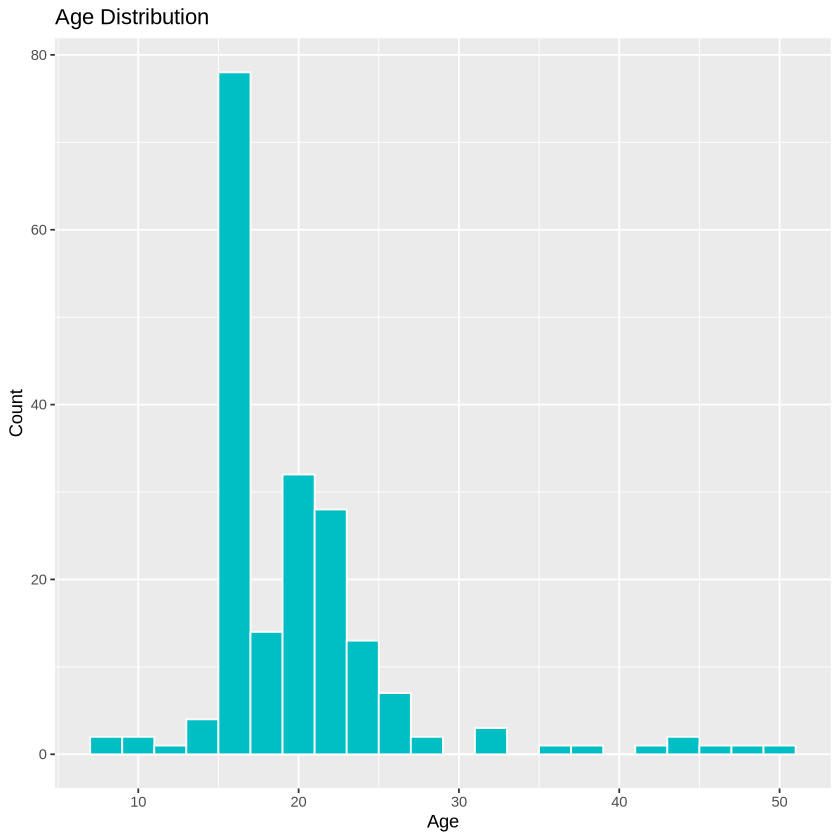

In [58]:
players_clean |> 
    ggplot(aes(x = Age)) +
    geom_histogram(binwidth = 2, fill = "#00BFC4", color = "white") +
    labs(title = "Age Distribution", x = "Age", y = "Count")

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


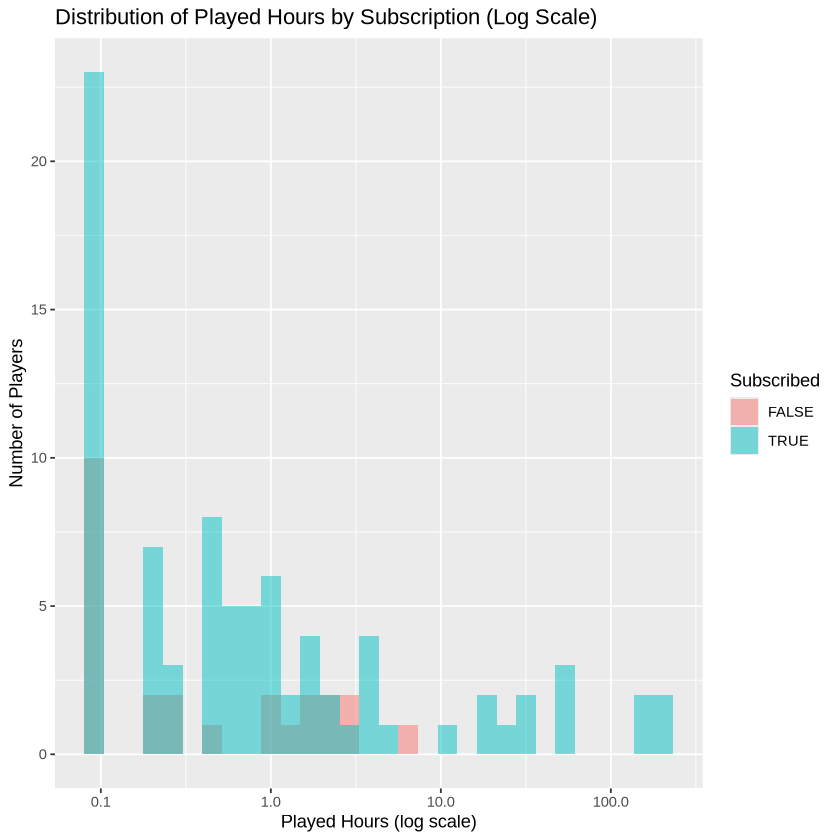

In [56]:
players_clean |> 
  ggplot(aes(x = played_hours, fill = subscribe)) +
  geom_histogram(position = "identity", alpha = 0.5, bins = 30) +
  scale_x_log10() +
  labs(
    title = "Distribution of Played Hours by Subscription (Log Scale)",
    x = "Played Hours (log scale)", 
    y = "Number of Players", 
    fill = "Subscribed"
  )

Using a log scale on the x-axis helps reveal the shape of the distribution across different levels of engagement. We see that while most players both subscribed and not have very low playtime, the **distribution for subscribed players is more spread out**, with many more playing for longer durations.


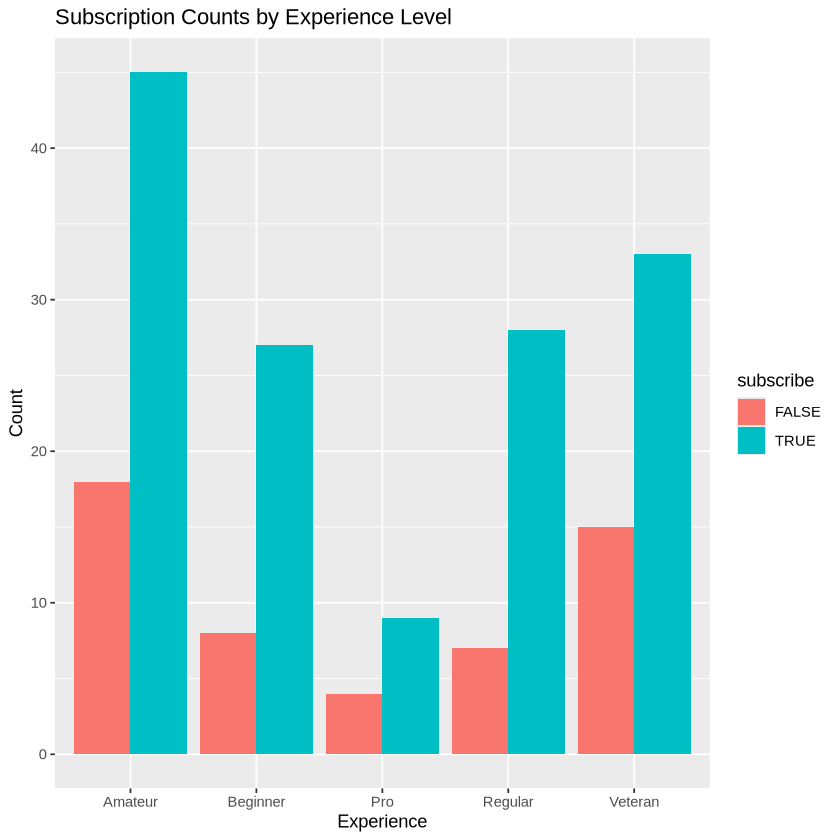

In [54]:
players_clean |> 
  ggplot(aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(title = "Subscription Counts by Experience Level", x = "Experience", y = "Count")

This plot shows the count of subscribed vs non-subscribed players across experience levels. We can see that players who consider themselves "Pro" or "Veteran" tend to subscribe more often than "Amateur" or "Regular" players.

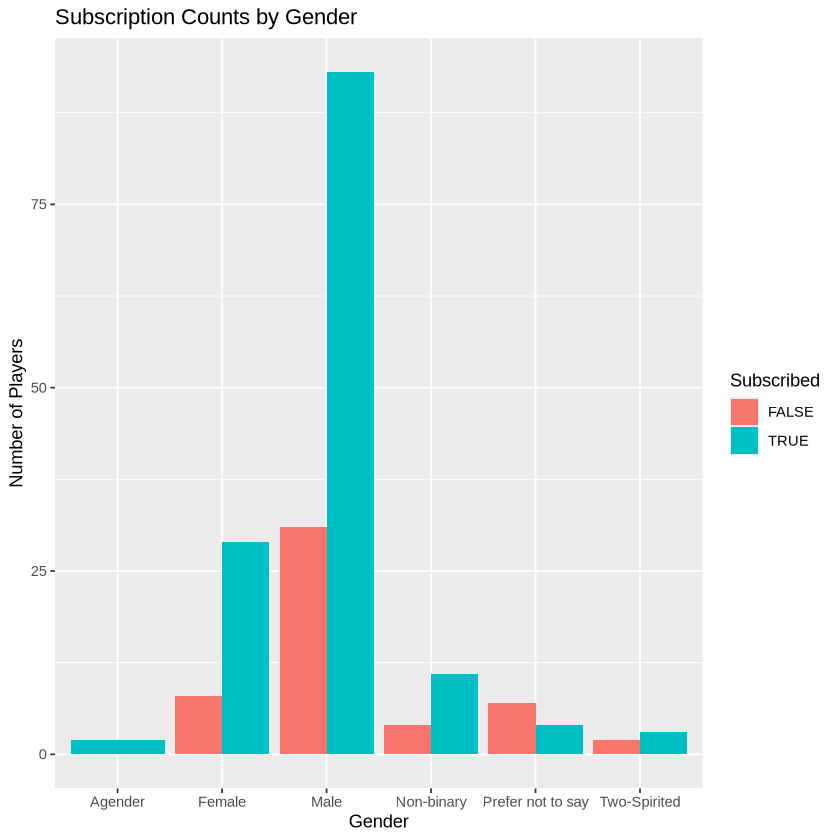

In [50]:
players_clean |> 
  ggplot(aes(x = gender, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Subscription Counts by Gender", 
    x = "Gender", 
    y = "Number of Players", 
    fill = "Subscribed"
  )

This plot shows that subscription counts are relatively similar across genders. There is no strong visual indication that gender has a major effect on subscription likelihood.

#### **Conclusion**

Our exploratory analysis suggests that player behavior and characteristics are related to newsletter subscription. Specifically:

- **Played Hours**: Subscribed players tend to have higher playtime, often by a large margin.
- **Age**: Most players are young, but age alone does not show a strong visual difference between groups.
- **Experience**: More experienced players (e.g., "Pro", "Veteran") are more likely to subscribe.
- **Gender**: Subscription rates are relatively similar across genders.

These insights suggest that `played_hours` and `experience` may be strong predictors of subscription behavior,. While `gender` and `age` may be weaker but still useful. 

### Modeling